# Machine Learning with Linear Regression

**Author:** Tammy Mims 

**Repository:** https://github.com/tmims71-ctrl/datafun-07-ml

## Introduction

This notebook demonstrates machine learning techniques using Python. We will:
- Load data into pandas DataFrames
- Use DataFrame attributes and methods to manage and analyze specific instances of data
- Apply linear regression models for predictive analysis
- Work with examples from Section 10.16 and 15.4 of our Python textbook to create linear regressions

The focus is on understanding how to create, train, and evaluate linear regression models using real-world datasets.

## Import Required Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1 - Chart a Straight Line

,Celsius,Fahrenheit
0,-10,14.0
1,-5,23.0
2,0,32.0
3,5,41.0
4,10,50.0


<Figure size 640x480 with 0 Axes>

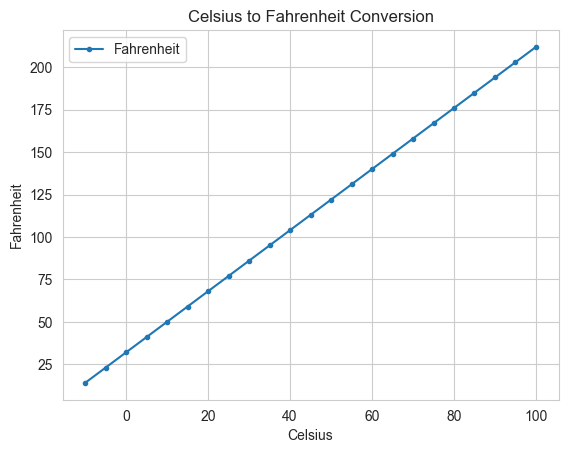


Understanding the Line Equation: y = mx + b
For Celsius to Fahrenheit conversion: F = (9/5)C + 32
  - Slope (m) = 9/5 = 1.8
  - Y-intercept (b) = 32


In [17]:
# Part 1 - Chart a Straight Line

# Clear any previous plots
plt.clf()

# Create Celsius values using np.arange, then compute Fahrenheit using the conversion formula
celsius = np.arange(-10, 101, 5)
fahrenheit = (9/5) * celsius + 32

# Create a DataFrame with temperature data (Celsius first, then Fahrenheit)
temps_df = pd.DataFrame({'Celsius': celsius, 'Fahrenheit': fahrenheit})

# Display first 5 rows
display(temps_df.head())

# Plot Celsius (x) vs Fahrenheit (y)
axes = temps_df.plot(x='Celsius', y='Fahrenheit', style='.-')
axes.set_xlabel('Celsius')
axes.set_ylabel('Fahrenheit')
plt.title('Celsius to Fahrenheit Conversion')
plt.show()

# Print the line equation information
print("\nUnderstanding the Line Equation: y = mx + b")
print("For Celsius to Fahrenheit conversion: F = (9/5)C + 32")
print("  - Slope (m) = 9/5 = 1.8")
print("  - Y-intercept (b) = 32")


## Part 2 - Machine Learning Workflow

### Section 1: Data Acquisition

In [3]:
# Load the NYC January high temperature data from CSV
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2: Data Inspection

In [4]:
# Display the first few rows of the DataFrame
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [5]:
# Display the last few rows of the DataFrame
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3: Data Cleaning

In [6]:
# Improve column names
nyc_df.columns = ['Year', 'Temperature', 'Anomaly']

# Extract only the 4-digit year from the Year column (original format is YYYYMM)
nyc_df['Year'] = nyc_df['Year'].astype(str).str[:4].astype(int)

# Display the cleaned data
nyc_df.head()


,Year,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


### Section 4: Descriptive Statistics

In [7]:
# Set display precision to 2 decimal places
pd.set_option('display.precision', 2)

# Display descriptive statistics for the dataset
print(nyc_df.describe())

          Year  Temperature  Anomaly
count   124.00       124.00   124.00
mean   1956.50        37.60     0.20
std      35.94         4.54     4.54
min    1895.00        26.10   -11.30
25%    1925.75        34.58    -2.82
50%    1956.50        37.60     0.20
75%    1987.25        40.60     3.20
max    2018.00        47.60    10.20


### Section 5: Build the Model

In [8]:
# Build the linear regression model
# Use linregress to calculate slope and intercept
slope, intercept, r_value, p_value, std_err = linregress(nyc_df['Year'], nyc_df['Temperature'])

print(f'Slope: {slope:.4f}')
print(f'Intercept: {intercept:.4f}')
print(f'R-value: {r_value:.4f}')
print(f'R-squared: {r_value**2:.4f}')


Slope: 0.0148
Intercept: 8.6950
R-value: 0.1169
R-squared: 0.0137


### Section 6: Predict

In [9]:
# Predict the average high temperature for January 2024
year_2024 = 2024
predicted_temp_2024 = slope * year_2024 + intercept

print(f'Predicted NYC average high temperature for January 2024: {predicted_temp_2024:.2f}°F')

Predicted NYC average high temperature for January 2024: 38.59°F


### Section 7: Visualizations

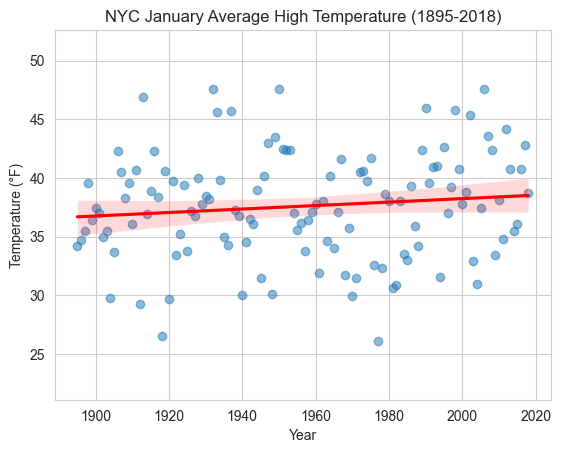

In [10]:
plt.clf()

# Create a scatter plot with best fit line using Seaborn
sns.set_style('whitegrid')

# Create the plot
ax = sns.regplot(x='Year', y='Temperature', data=nyc_df, 
                 scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (°F)')
ax.set_title('NYC January Average High Temperature (1895-2018)')

# Set y-axis limits
ax.set_ylim(nyc_df['Temperature'].min() - 5, nyc_df['Temperature'].max() + 5)

plt.show()

## Part 3 - Prediction

### Section 1 - Build the Model


In [11]:
# Prepare features (X) and target (y) as arrays for scikit-learn
X = nyc_df[['Year']].values  # 2D array required by sklearn
y = nyc_df['Temperature'].values

# Split data into training (75%) and testing (25%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

# Check the shape of each set
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape:  {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape:  {y_test.shape}')

# Train the model using Linear Regression fit (using keyword args like the textbook)
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train);

# View the coef_ and intercept_ attributes needed for the line equation (y = mx + b)
print(f'Linear Regression Coefficient (Slope):  {linear_regression.coef_[0]}')
print(f'Linear Regression Intercept:            {linear_regression.intercept_}')


X_train shape: (93, 1)
X_test shape:  (31, 1)
y_train shape: (93,)
y_test shape:  (31,)
Linear Regression Coefficient (Slope):  0.019391673294782773
Linear Regression Intercept:            -0.30779820252656975


### Section 2 - Test the Model


In [12]:
predicted = linear_regression.predict(X_test)
expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')


predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


In [13]:
# Display predicted vs actual values as a formatted table
results_df = pd.DataFrame({
    'Year': X_test.flatten(),
    'Actual Temp (°F)': expected,
    'Predicted Temp (°F)': predicted.flatten()
}).sort_values('Year').reset_index(drop=True)

display(results_df)


,Year,Actual Temp (°F),Predicted Temp (°F)
0,1895,34.2,36.44
1,1897,35.5,36.48
2,1901,37.0,36.56
3,1904,29.8,36.61
4,1910,36.1,36.73
5,1911,40.7,36.75
6,1916,42.3,36.85
7,1917,38.4,36.87
8,1921,39.7,36.94
9,1924,39.4,37.00


### Section 3 - Predict


In [14]:
# Define a predict lambda using coef_ as m and intercept_ as b  (y = mx + b)
predict = (lambda x: linear_regression.coef_ * x +
                     linear_regression.intercept_)

# Predict January 1890 average high temperature
print(f'Predicted average high temperature in NYC for January 1890: {predict(1890)[0]:.2f}°F')

# Estimate January  average high temperature
print(f'Estimated average high temperature in NYC for January 2019: {predict(2019)[0]:.2f}°F')

# Predict January 2024 average high temperature
print(f'Predicted average high temperature in NYC for January 2024: {predict(2024)[0]:.2f}°F')


Predicted average high temperature in NYC for January 1890: 36.34°F
Estimated average high temperature in NYC for January 2019: 38.84°F
Predicted average high temperature in NYC for January 2024: 38.94°F


### Section 4 - Visualizations


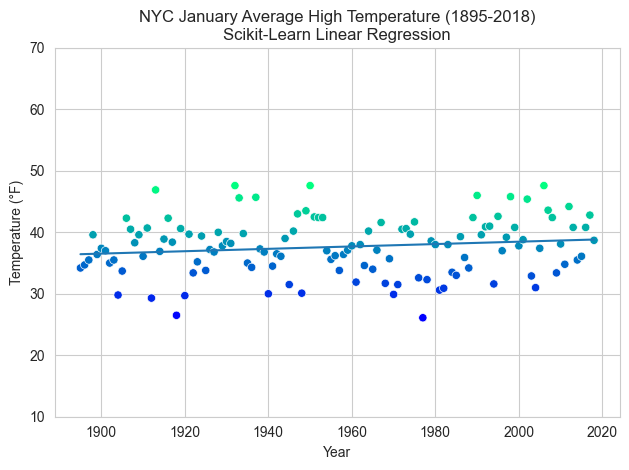

In [15]:
plt.clf()

# Scatter plot with best fit line using the sklearn model (textbook style)
sns.set_style('whitegrid')

axes = sns.scatterplot(data=nyc_df, x='Year', y='Temperature',
    hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10, 70)

# Generate x values and predicted y values for the best fit line
x = np.array([min(nyc_df['Year'].values), max(nyc_df['Year'].values)])
y = predict(x)

line = plt.plot(x, y)

axes.set_xlabel('Year')
axes.set_ylabel('Temperature (°F)')
axes.set_title('NYC January Average High Temperature (1895-2018)\nScikit-Learn Linear Regression')

plt.tight_layout()
plt.show()


## Part 4 - Insights

Both Part 2 (SciPy `linregress`) and Part 3 (Scikit-Learn `LinearRegression`) applied linear regression to the same NYC January temperature dataset. Here are three key comparisons:

- **Results are consistent.** Both methods produced nearly identical predictions — approximately **38.6–38.9 °F** for January 2024 — with slopes pointing in the same direction, confirming a slight upward temperature trend over 1895–2018.

- **Year is a weak predictor.** The R-squared value of ~0.014 means year explains less than 2% of the variation in January temperatures. The p-value (0.196) is above the 0.05 significance threshold, indicating the trend may not be statistically meaningful.

- **Scikit-Learn adds a train/test split.** Unlike `linregress` which fits on all data, Scikit-Learn held out 25% (31 rows) as a test set, revealing that the model does not generalize well — an important safeguard for evaluating real-world model performance.